# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from io import open

# Common imports
import numpy as np
import os
import PIL

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
# A couple utility functions to plot grayscale and RGB images:

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")

In [3]:
# Of course we will need TensorFlow:

import tensorflow as tf

/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarnin

# Convolutional layer

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

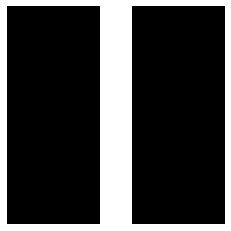

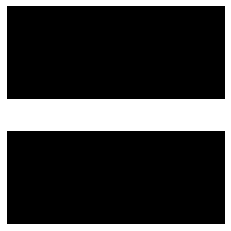

In [5]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [6]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1, 1, 1, 1], padding="SAME")

In [7]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

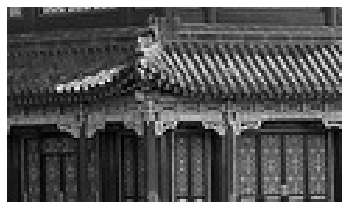

In [8]:
# The input image
plot_image(images[0, :, :,0])
plt.savefig("china_original", tight_layout=False)
plt.show()

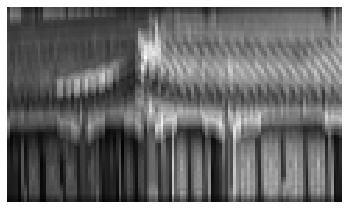

In [9]:
# Vertical Filter on the input image:
plot_image(output[0, :, :, 0])
plt.savefig("china_vertical", tight_layout=False)
plt.show()

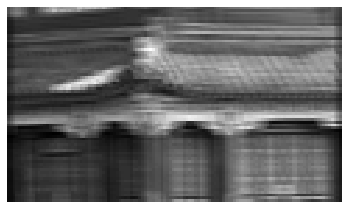

In [10]:
# Horizontal Filter on the input image:
plot_image(output[0, :, :, 1])
plt.savefig("china_horizontal", tight_layout=False)
plt.show()

# Simple Example of TensorFlow Implementation

In [11]:
# In TensorFlow, each input image is typically represented as a 3D tensor of shape[height, width, channels].
# A mini-batch is represented as a 4D tensor of shape[mini-batch size, height, width, channels]
# The weights of a convolutional layer are represented as a 4D tensor.
# The bias terms are simply represented as a 1D tensor

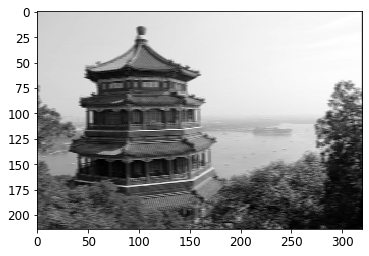

In [12]:
# Let's look at a simple example. 
# The following code loads two sample images using Scikit-Learn's load_sample_images().
    # load_sample_images() loads 2 color images. Then it creates two 7x7 filters
    # on page 368
    
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's second feature map
plt.show()

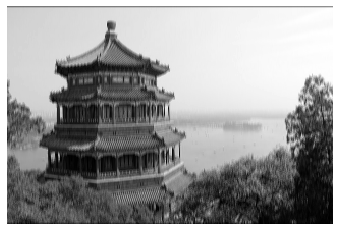

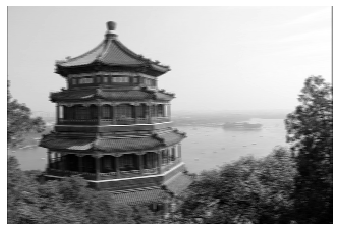

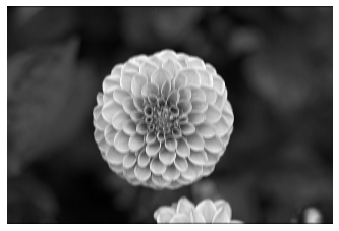

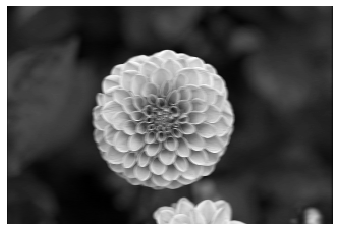

In [13]:
# What the hell is this code?

for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [14]:
# The next bits of code show how to use tf.layers.conv2d():

reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding="SAME")

# Here is an explanation of tf.layers.conv2d():
    # X is the input mini-batch (a 4D tensor, as explained earlier)
    # filters is the set of filters to apply(also a 4D tensor)
    # strides is a four element 1D array, where the two central elements are the vertical and horizontal strides.
    # Padding must be either "VALID" or "SAME":
        # If set to "VALID", the convolutional layer does not use zero padding and may ignore some rows and columns at the bottom and right of the input image.
        # If set to "SAME", the convolutional layer uses zero padding if necessary. The number of zeros are added as evenly as possible to make the input neurons=output neurons.
        
        

In [15]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

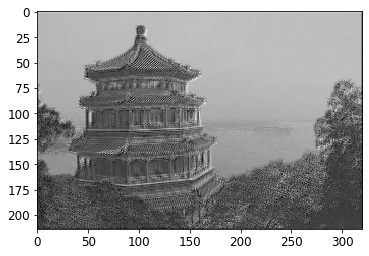

In [17]:
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

# VALID vs SAME padding

In [20]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13. ], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32). reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())
    


VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [21]:
print("VALID:")
print(np.array([1, 2, 3, 4, 5, 6]).T.dot(filter_primes))
print(np.array([6, 7, 8, 9, 10, 11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0, 1, 2, 3, 4, 5]).T.dot(filter_primes))
print(np.array([5, 6, 7, 8, 9, 10]).T.dot(filter_primes))
print(np.array([10, 11, 12, 13, 0, 0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


# Memory Requirements

In [22]:
# Another problem with Convolutional Neural Networks is that the convolutional layers require a huge amount of RAM. 
# This is especially true during training because the reverse pass of backpropagation requires all the intermediatevalues computed during the forward pass.


# Pooling Layer

In [23]:
# The goal of a pooling layer is to subsample (shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters(thereby limiting the risk of overfitting).
# Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field.
# Of course this is a very destructive process. A significant amount of data is lost depending on the size of the pooling kernel.

# Before showing how to implement the pooling layer in TensorFlow, let's load the images in the dataset:

batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line


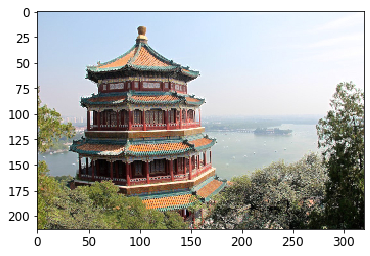

In [25]:
# Now let's implement the max pooling layer in TensorFlow.
# The following code creates a max pooling layer using a 2 x 2 kernel, stride 2, and no padding, then applies it to all images in the dataset:

# Create a graph with input X plus a max pooling layer:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8)) # plot the output for the 1st image
plt.show()

# The ksize argument contains the kernel shape along all four dimensions of the input tensor: [batch size, height, width, channels]

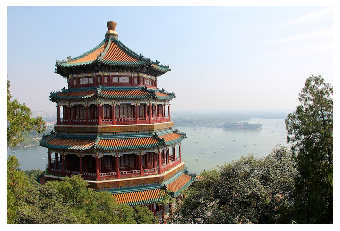

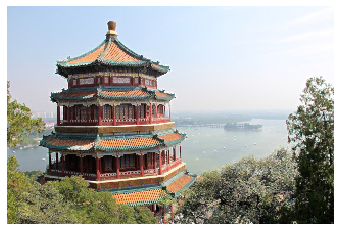

In [26]:
plot_color_image(dataset[0])
plt.savefig("china_original")
plt.show()

plot_color_image(output[0])
plt.savefig("china_max_pool")
plt.show()

# MNIST

In [32]:
# Instead of using the fully_connected(), conv2d() and dropout() functions from tensorflow.contrib.layers module (as shown in the book)...
# We now use the dense(), conv2d(), and dropout() functions from the tf.layers.module
# This is preferable because anything in contrib may change or be deleted without notice, while tf.layers is part of the official API.

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [33]:
# tf.examples.tutorials.mnist is deprecated. We will use tf.keras.datasets.mnist instead.

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [34]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [35]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)
        save_path = saver.save(sess, "./my_mnist_model")

0 Last batch accuracy: 0.99 Test accuracy: 0.9775
1 Last batch accuracy: 0.98 Test accuracy: 0.9835
2 Last batch accuracy: 0.98 Test accuracy: 0.9804
3 Last batch accuracy: 0.98 Test accuracy: 0.9878
4 Last batch accuracy: 0.99 Test accuracy: 0.9882
5 Last batch accuracy: 1.0 Test accuracy: 0.988
6 Last batch accuracy: 0.99 Test accuracy: 0.9892
7 Last batch accuracy: 1.0 Test accuracy: 0.9907
8 Last batch accuracy: 1.0 Test accuracy: 0.9851
9 Last batch accuracy: 1.0 Test accuracy: 0.9881
